In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | basar
Processing Record 2 of Set 1 | parrita
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | novomichurinsk
Processing Record 6 of Set 1 | algete
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | toliary
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | oildale
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | santa cruz
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | henties bay
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | nichinan
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | thompson
Processi

Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | qasigiannguit
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | las cruces
Processing Record 44 of Set 4 | dubbo
Processing Record 45 of Set 4 | green valley
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 48 of Set 4 | itaituba
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | juneau
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | youkounkoun
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 5 of Set 5 | sola
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | pemangkat
Processing Record 8 of Set 5 | dicabisagan
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | pangkalanbuun
Processing Record 11 of Set 5 | kloulklubed
Processing Record 12 o

City not found. Skipping...
Processing Record 24 of Set 8 | san-pedro
Processing Record 25 of Set 8 | aleppo
Processing Record 26 of Set 8 | tulun
Processing Record 27 of Set 8 | meulaboh
Processing Record 28 of Set 8 | yulara
Processing Record 29 of Set 8 | cumberland
Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | bondo
Processing Record 32 of Set 8 | mandalgovi
Processing Record 33 of Set 8 | edd
Processing Record 34 of Set 8 | basoko
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | anamur
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | armidale
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | bo phloi
Processing Record 42 of Set 8 | omboue
Processing Record 43 of Set 8 | inza
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | ambilobe
Processing Record 46 of Set 8 | matay
Processing Record 47 of Set 8 | kenai
Processi

Processing Record 11 of Set 12 | sadzhavka
Processing Record 12 of Set 12 | pangai
Processing Record 13 of Set 12 | baswa
Processing Record 14 of Set 12 | champerico
Processing Record 15 of Set 12 | hoquiam
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | college place
Processing Record 18 of Set 12 | urubicha
Processing Record 19 of Set 12 | kemin
Processing Record 20 of Set 12 | umm lajj
Processing Record 21 of Set 12 | martapura
Processing Record 22 of Set 12 | noshiro
Processing Record 23 of Set 12 | berlevag
Processing Record 24 of Set 12 | bereda
Processing Record 25 of Set 12 | salalah
Processing Record 26 of Set 12 | sabha
Processing Record 27 of Set 12 | kemijarvi
Processing Record 28 of Set 12 | callaway
Processing Record 29 of Set 12 | chilliwack
Processing Record 30 of Set 12 | bauchi
Processing Record 31 of Set 12 | kyra
Processing Record 32 of Set 12 | dunda
Processing Record 33 of Set 12 | naica
Processing Record 34 of Set 12 | gizo
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Basar,27.9833,94.6667,71.82,99,89,1.41,IN,2021-07-31 20:31:14
1,Parrita,9.5201,-84.3225,91.53,73,39,5.19,CR,2021-07-31 20:31:14
2,Atuona,-9.8000,-139.0333,76.80,69,53,13.29,PF,2021-07-31 20:31:15
3,Port Elizabeth,-33.9180,25.5701,52.09,76,40,4.61,ZA,2021-07-31 20:31:15
4,Novomichurinsk,54.0384,39.7479,69.62,72,34,5.82,RU,2021-07-31 20:31:16
5,Algete,40.5971,-3.4974,71.26,66,0,10.36,ES,2021-07-31 20:31:16
6,Laguna,38.4210,-121.4238,99.64,33,1,5.99,US,2021-07-31 20:31:16
7,Ribeira Grande,38.5167,-28.7000,77.40,65,20,8.05,PT,2021-07-31 20:31:17
8,Ushuaia,-54.8000,-68.3000,44.26,57,75,18.41,AR,2021-07-31 20:29:27
9,Oildale,35.4197,-119.0195,102.96,17,1,13.80,US,2021-07-31 20:31:18


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Basar,IN,2021-07-31 20:31:14,27.9833,94.6667,71.82,99,89,1.41
1,Parrita,CR,2021-07-31 20:31:14,9.5201,-84.3225,91.53,73,39,5.19
2,Atuona,PF,2021-07-31 20:31:15,-9.8000,-139.0333,76.80,69,53,13.29
3,Port Elizabeth,ZA,2021-07-31 20:31:15,-33.9180,25.5701,52.09,76,40,4.61
4,Novomichurinsk,RU,2021-07-31 20:31:16,54.0384,39.7479,69.62,72,34,5.82
...,...,...,...,...,...,...,...,...,...
556,Ivdel,RU,2021-07-31 20:35:07,60.6911,60.4206,57.81,99,100,5.26
557,Requena,ES,2021-07-31 20:35:07,39.4883,-1.1004,71.80,57,7,9.57
558,Shache,CN,2021-07-31 20:35:07,38.4167,77.2406,82.85,26,100,9.55
559,Alice Springs,AU,2021-07-31 20:31:08,-23.7000,133.8833,54.95,76,0,5.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

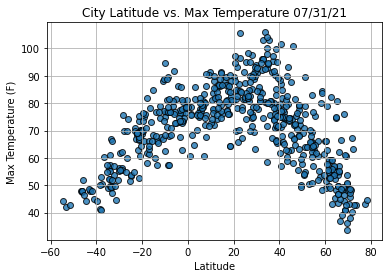

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

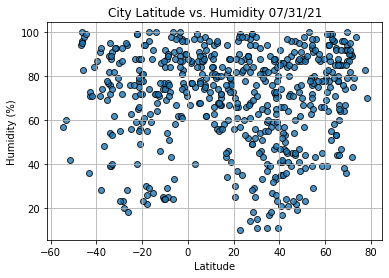

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

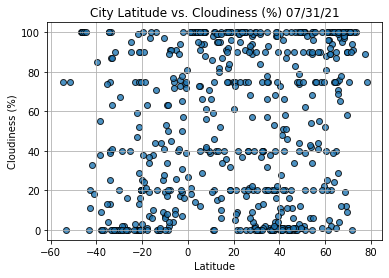

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

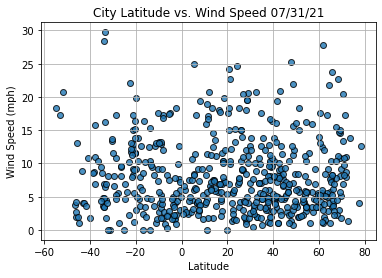

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

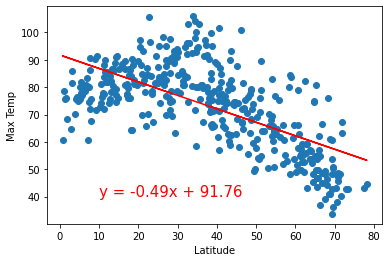

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (10,40))

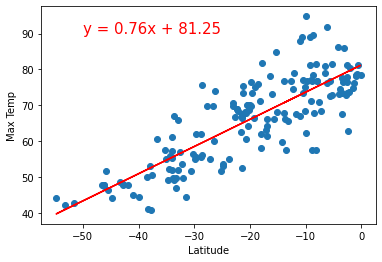

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

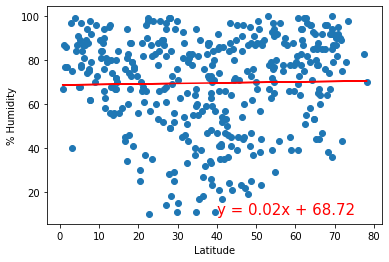

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

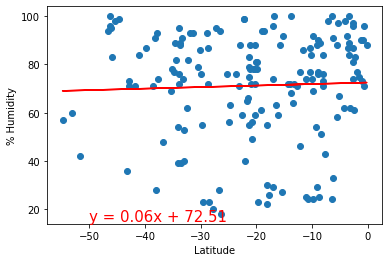

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

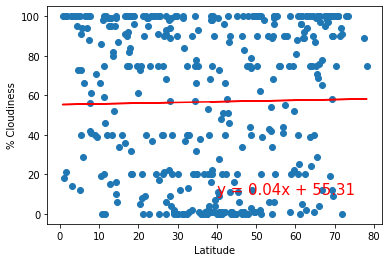

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness' ,(40,10))

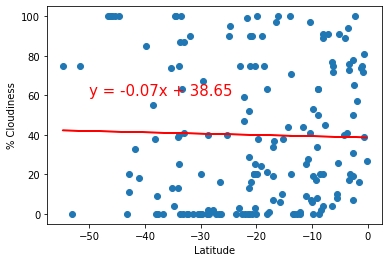

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

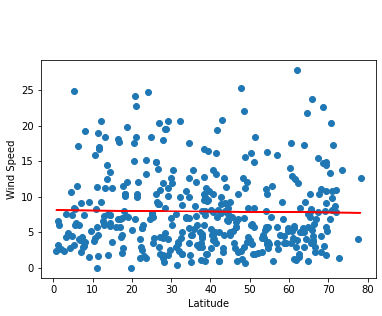

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed', (40,35))

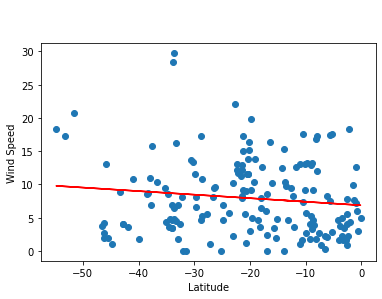

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed', (-50,35))